In [102]:
import pandas as pd
import numpy as np

In [103]:
area_coords = pd.read_csv('combined_geocoded_areas.csv')
landmarks = pd.read_csv('landmark_coordinates.csv')
malls = pd.read_csv('mall_coordinates.csv')
# Create a DataFrame with farthest and center points of Dubai with higher precision
dubai_extremes = pd.DataFrame({
    "point": ["north", "south", "east", "west", "center"],
    "latitude": [25.400000, 24.850000, 25.350000, 25.150000, 25.270000],
    "longitude": [55.270000, 55.270000, 55.600000, 55.000000, 55.300000]
})


In [104]:
# Load data
area_coords = pd.read_csv('combined_geocoded_areas.csv')
landmarks = pd.read_csv('landmark_coordinates.csv')
malls = pd.read_csv('mall_coordinates.csv')

# Dubai extremes DataFrame
dubai_extremes = pd.DataFrame({
    "point": ["north", "south", "east", "west", "center"],
    "latitude": [25.400000, 24.850000, 25.350000, 25.150000, 25.270000],
    "longitude": [55.270000, 55.270000, 55.600000, 55.000000, 55.300000]
})

# Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Create an empty list to store results
distances = []

# Iterate through areas
for _, area in area_coords.iterrows():
    area_name = area['area_en']
    area_lat = area['latitude']
    area_lon = area['longitude']
    
    # Calculate distances to landmarks
    for _, landmark in landmarks.iterrows():
        dist = haversine(area_lat, area_lon, landmark['latitude'], landmark['longitude'])
        distances.append({'area_en': area_name, 'type': 'landmark', 'name': landmark['landmark'], 'distance_km': dist})
    
    # Calculate distances to malls
    for _, mall in malls.iterrows():
        dist = haversine(area_lat, area_lon, mall['latitude'], mall['longitude'])
        distances.append({'area_en': area_name, 'type': 'mall', 'name': mall['mall'], 'distance_km': dist})
    
    # Calculate distances to Dubai extremes
    for _, extreme in dubai_extremes.iterrows():
        dist = haversine(area_lat, area_lon, extreme['latitude'], extreme['longitude'])
        distances.append({'area_en': area_name, 'type': 'extreme', 'name': extreme['point'], 'distance_km': dist})

# Convert results into a DataFrame
distance_df = pd.DataFrame(distances)

# Save the DataFrame to a CSV file
distance_df.to_csv('area_distances.csv', index=False)

# Display a sample of the result
print(distance_df)

        area_en      type                         name  distance_km
0     AL BARARI  landmark         IMG World Adventures     4.038671
1     AL BARARI  landmark  Dubai International Airport    15.487226
2     AL BARARI  landmark               Downtown Dubai     9.479825
3     AL BARARI  landmark                   Motor City    11.493482
4     AL BARARI  landmark                 Burj Al Arab    13.874654
...         ...       ...                          ...          ...
6001    Muragab   extreme                        north    15.905107
6002    Muragab   extreme                        south    46.531049
6003    Muragab   extreme                         east    29.278656
6004    Muragab   extreme                         west    35.048861
6005    Muragab   extreme                       center     2.473749

[6006 rows x 4 columns]


In [105]:
distance_df.to_csv('distances.csv')

In [106]:
distance_df.drop(columns=['type'])

,area_en,name,distance_km
0,AL BARARI,IMG World Adventures,4.038671
1,AL BARARI,Dubai International Airport,15.487226
2,AL BARARI,Downtown Dubai,9.479825
3,AL BARARI,Motor City,11.493482
4,AL BARARI,Burj Al Arab,13.874654
...,...,...,...
6001,Muragab,north,15.905107
6002,Muragab,south,46.531049
6003,Muragab,east,29.278656
6004,Muragab,west,35.048861


In [107]:
# Pivot the DataFrame
pivoted_df = distance_df.pivot(index='area_en', columns='name', values='distance_km')

# Flatten the columns and reset index
pivoted_df.columns.name = None  # Remove the name from the columns
pivoted_df.reset_index(inplace=True)

# Save to CSV (optional)
pivoted_df.to_csv("area_distance_matrix.csv", index=False)

# Display the cleaned DataFrame
print(pivoted_df)

              area_en  Al Makhtoum International Airport  Burj Al Arab  \
0           AL Athbah                          46.188410     29.664620   
1           AL BARARI                          30.608016     13.874654   
2           AL FURJAN                          16.064378     12.770850   
3    AL KHAIL HEIGHTS                          31.480353      7.061189   
4             AL WAHA                          20.449810     16.023778   
..                ...                                ...           ...   
268    Wadi Al Safa 7                          20.763588     15.329463   
269      Warsan First                          45.723781     21.930711   
270     Warsan Fourth                          40.331545     24.095928   
271     Zaabeel First                          40.209496     14.394523   
272    Zaabeel Second                          37.222094     11.729992   

     Burj Khalifa  City Centre Mirdif  Downtown Dubai  \
0       20.346370            7.752184       19.938341 

In [108]:
sales_df = pd.read_csv('../data/snp_dld_2024_transactions.csv')
area_group = sales_df.groupby('area_en').agg({
    'project_name_en': 'count',        # Non-null project names
    'nearest_landmark_en': 'count',   # Non-null nearest landmarks
    "nearest_metro_en": 'count',      # Non-null nearest metro entries
    "nearest_mall_en": 'count',       # Non-null nearest mall entries
}).reset_index()

# Rename columns for clarity
area_group.rename(columns={
    'project_name_en': 'project_count',
    'nearest_landmark_en': 'landmark_count',
    'nearest_metro_en': 'metro_count',
    'nearest_mall_en': 'mall_count'
}, inplace=True)


In [109]:
area_group.to_csv('area_group_landmarks_count.csv')

In [110]:
area_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   area_en         273 non-null    object
 1   project_count   273 non-null    int64 
 2   landmark_count  273 non-null    int64 
 3   metro_count     273 non-null    int64 
 4   mall_count      273 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 10.8+ KB


In [111]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   area_en                            273 non-null    object 
 1   Al Makhtoum International Airport  273 non-null    float64
 2   Burj Al Arab                       273 non-null    float64
 3   Burj Khalifa                       273 non-null    float64
 4   City Centre Mirdif                 273 non-null    float64
 5   Downtown Dubai                     273 non-null    float64
 6   Dubai International Airport        273 non-null    float64
 7   Dubai Mall                         273 non-null    float64
 8   Dubai Parks and Resorts            273 non-null    float64
 9   Expo 2020 Site                     273 non-null    float64
 10  Global Village                     273 non-null    float64
 11  Hamdan Sports Complex              273 non-null    float64

In [112]:
merged_df = pd.merge(area_group, pivoted_df, on='area_en', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   area_en                            273 non-null    object 
 1   project_count                      273 non-null    int64  
 2   landmark_count                     273 non-null    int64  
 3   metro_count                        273 non-null    int64  
 4   mall_count                         273 non-null    int64  
 5   Al Makhtoum International Airport  273 non-null    float64
 6   Burj Al Arab                       273 non-null    float64
 7   Burj Khalifa                       273 non-null    float64
 8   City Centre Mirdif                 273 non-null    float64
 9   Downtown Dubai                     273 non-null    float64
 10  Dubai International Airport        273 non-null    float64
 11  Dubai Mall                         273 non-null    float64

In [113]:
no_missing_sales = pd.read_csv('../data/sales_data_no_missing.csv')

In [114]:
no_missing_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162806 entries, 0 to 162805
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   transaction_type_id             162806 non-null  int64  
 1   registration_type_en            162806 non-null  object 
 2   property_usage_id               162806 non-null  int64  
 3   amount                          162806 non-null  float64
 4   total_buyer                     162806 non-null  int64  
 5   total_seller                    162806 non-null  int64  
 6   transaction_size_sqm            162806 non-null  float64
 7   property_size_sqm               162806 non-null  float64
 8   is_offplan                      162806 non-null  object 
 9   is_freehold                     162806 non-null  object 
 10  property_type_en                162806 non-null  object 
 11  property_subtype_en             162806 non-null  object 
 12  project_name_en 

In [115]:
no_missing_merged_loc = pd.merge(no_missing_sales,merged_df, on="area_en", how="left")
no_missing_merged_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162806 entries, 0 to 162805
Data columns (total 57 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   transaction_type_id                162806 non-null  int64  
 1   registration_type_en               162806 non-null  object 
 2   property_usage_id                  162806 non-null  int64  
 3   amount                             162806 non-null  float64
 4   total_buyer                        162806 non-null  int64  
 5   total_seller                       162806 non-null  int64  
 6   transaction_size_sqm               162806 non-null  float64
 7   property_size_sqm                  162806 non-null  float64
 8   is_offplan                         162806 non-null  object 
 9   is_freehold                        162806 non-null  object 
 10  property_type_en                   162806 non-null  object 
 11  property_subtype_en                1628

## Convert columnt to categorical data if needed

In [116]:
no_missing_merged_loc['transaction_type_id'].unique()

array([1, 2, 3])

In [117]:
# Convert transaction_type_id to a categorical type
no_missing_merged_loc['transaction_type_id'] = no_missing_merged_loc['transaction_type_id'].astype('category')

# Verify the change
print(no_missing_merged_loc['transaction_type_id'].dtypes)

category


In [118]:
no_missing_merged_loc['registration_type_en'].unique()

array(['Off-Plan', 'Ready'], dtype=object)

In [119]:
no_missing_merged_loc['registration_type_en'] = no_missing_merged_loc['registration_type_en'].astype('category')
no_missing_merged_loc['registration_type_encoded'] = no_missing_merged_loc['registration_type_en'].cat.codes
no_missing_merged_loc['registration_type_encoded'].unique()

array([0, 1], dtype=int8)

In [120]:
print(no_missing_merged_loc['registration_type_en'].cat.categories)

Index(['Off-Plan', 'Ready'], dtype='object')


In [121]:
no_missing_merged_loc = no_missing_merged_loc.drop(columns=['registration_type_en'])

In [122]:
no_missing_merged_loc['property_usage_id'].unique()

array([1, 2])

### Handling the `property_usage_id` Feature

The `property_usage_id` column in the dataset has two unique values: `1` and `2`. These values have a clear ordinal relationship, where:

- `1` represents one category.
- `2` represents another, with a meaningful order.

To ensure the feature is efficiently stored and its order preserved during modeling, the following strategy is applied:

1. **Convert to Categorical Type**: Storing the column as a categorical type reduces memory usage while retaining the ordinal relationship between the categories.
2. **Specify the Order**: By explicitly defining the order of the categories (`1 < 2`), the column can be seamlessly used in models that require ordinal inputs.

This strategy ensures that the feature is both space-efficient and ready for use in machine learning models while maintaining its ordinal semantics.


In [123]:
# Convert 'property_usage_id' to a categorical type with an explicit order
no_missing_merged_loc['property_usage_id'] = pd.Categorical(
    no_missing_merged_loc['property_usage_id'],
    categories=[1, 2],  # Explicitly specify the order
    ordered=True
)

# Verify the change
print(no_missing_merged_loc['property_usage_id'].dtype)

category


In [124]:
no_missing_merged_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162806 entries, 0 to 162805
Data columns (total 57 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   transaction_type_id                162806 non-null  category
 1   property_usage_id                  162806 non-null  category
 2   amount                             162806 non-null  float64 
 3   total_buyer                        162806 non-null  int64   
 4   total_seller                       162806 non-null  int64   
 5   transaction_size_sqm               162806 non-null  float64 
 6   property_size_sqm                  162806 non-null  float64 
 7   is_offplan                         162806 non-null  object  
 8   is_freehold                        162806 non-null  object  
 9   property_type_en                   162806 non-null  object  
 10  property_subtype_en                162806 non-null  object  
 11  project_name_en           

### Handling the `amount` Feature

The `amount` column is a continuous numerical variable crucial for modeling. To ensure it is handled effectively:

1. **Check for Missing Values**:
   - Ensure the column has no missing values. If missing values exist, use an appropriate imputation strategy (e.g., median or mean).

2. **Analyze Distribution**:
   - Understand the distribution of the `amount` values using visualization tools (e.g., histograms, box plots).
   - If the distribution is highly skewed, apply a log transformation to normalize the data.

3. **Scaling**:
   - Scaling might be necessary for some models:
     - Tree-based models: No scaling required.
     - Distance-based models: Apply standardization or normalization.

4. **Feature Engineering** (Optional):
   - Create additional features based on `amount`:
     - Log-transformed values for skewed distributions.
     - Binned categories (e.g., low, medium, high) for categorical representations.

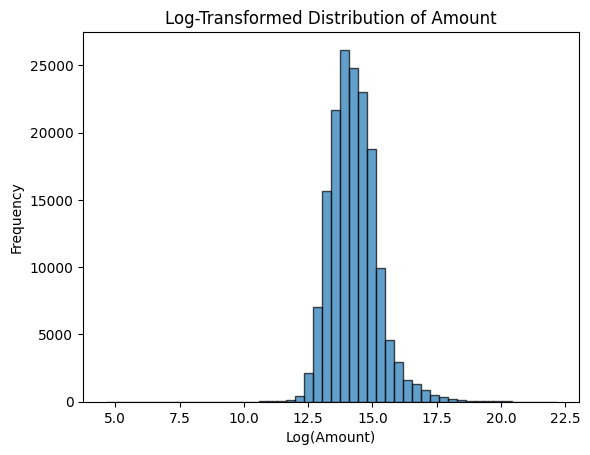

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Log-transform the amount to reduce skewness
log_amount = np.log1p(no_missing_merged_loc['amount'])  # Use log1p to handle zero values if any

# Plot the histogram of the log-transformed amount
plt.hist(log_amount, bins=50, edgecolor='k', alpha=0.7)
plt.title("Log-Transformed Distribution of Amount")
plt.xlabel("Log(Amount)")
plt.ylabel("Frequency")
plt.show()


In [126]:
# Min-Max Normalization
amount_min = no_missing_merged_loc['amount'].min()
amount_max = no_missing_merged_loc['amount'].max()

no_missing_merged_loc['amount_normalized'] = (no_missing_merged_loc['amount'] - amount_min) / (amount_max - amount_min)

# Z-Score Standardization
amount_mean = no_missing_merged_loc['amount'].mean()
amount_std = no_missing_merged_loc['amount'].std()

no_missing_merged_loc['amount_standardized'] = (no_missing_merged_loc['amount'] - amount_mean) / amount_std

# Combine Normalization and Standardization
normalized_amount = (no_missing_merged_loc['amount'] - amount_min) / (amount_max - amount_min)
normalized_mean = normalized_amount.mean()
normalized_std = normalized_amount.std()

no_missing_merged_loc['amount_scaled'] = (normalized_amount - normalized_mean) / normalized_std

# Display results
print(no_missing_merged_loc[['amount', 'amount_normalized', 'amount_standardized', 'amount_scaled']])



            amount  amount_normalized  amount_standardized  amount_scaled
0        886320.00           0.000209            -0.095867      -0.095867
1       1169025.00           0.000275            -0.084521      -0.084521
2       1285588.11           0.000303            -0.079844      -0.079844
3       2636200.00           0.000620            -0.025642      -0.025642
4       1681899.00           0.000396            -0.063939      -0.063939
...            ...                ...                  ...            ...
162801  1620127.50           0.000381            -0.066418      -0.066418
162802  2788750.64           0.000656            -0.019520      -0.019520
162803   675085.76           0.000159            -0.104344      -0.104344
162804   491000.00           0.000116            -0.111732      -0.111732
162805   887282.00           0.000209            -0.095828      -0.095828

[162806 rows x 4 columns]


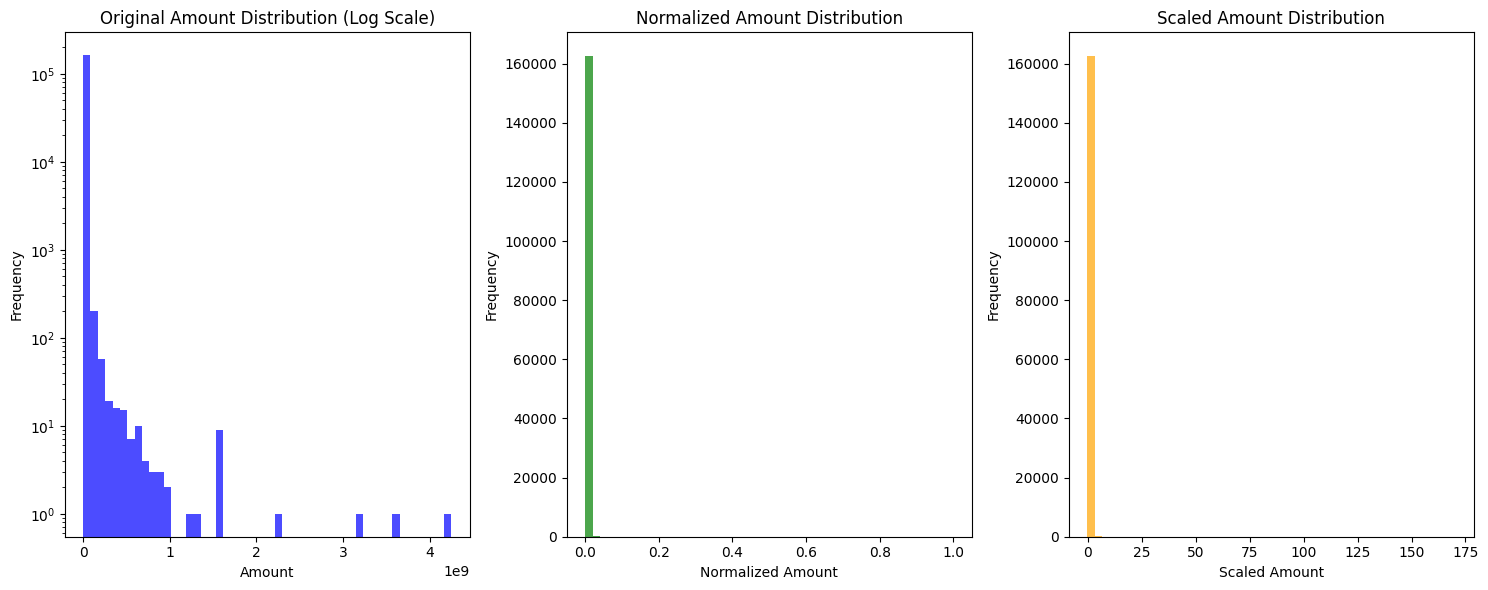

In [127]:
# Improved Visualization of Distributions
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(no_missing_merged_loc['amount'], bins=50, color='blue', alpha=0.7)
plt.yscale('log')  # Log scale for better visualization of skewed data
plt.title('Original Amount Distribution (Log Scale)')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(no_missing_merged_loc['amount_normalized'], bins=50, color='green', alpha=0.7)
plt.title('Normalized Amount Distribution')
plt.xlabel('Normalized Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(no_missing_merged_loc['amount_scaled'], bins=50, color='orange', alpha=0.7)
plt.title('Scaled Amount Distribution')
plt.xlabel('Scaled Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('improved_tmpfig.png')
plt.show()



In [128]:
print(amount_min)
print(amount_max)
print(amount_mean)
print(amount_std)

100.89
4248836158.5
3275140.0899088485
24918124.817943845


In [129]:
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
no_missing_merged_loc['amount_quantile_scaled'] = quantile_transformer.fit_transform(
    no_missing_merged_loc[['amount']]
)

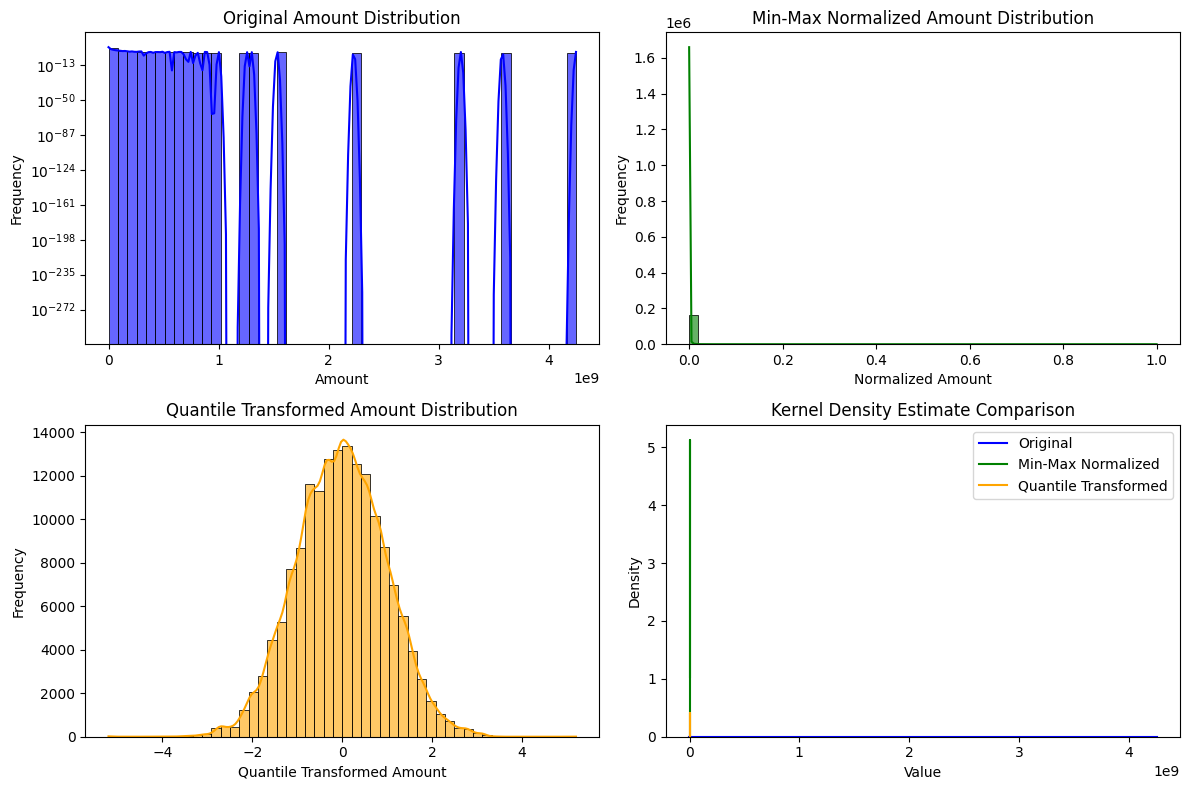

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Original Amount Distribution
plt.subplot(2, 2, 1)
sns.histplot(no_missing_merged_loc['amount'], bins=50, kde=True, color='blue', alpha=0.6)
plt.title('Original Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale for better visibility of distribution

# Min-Max Normalized Amount Distribution
plt.subplot(2, 2, 2)
sns.histplot(no_missing_merged_loc['amount_normalized'], bins=50, kde=True, color='green', alpha=0.6)
plt.title('Min-Max Normalized Amount Distribution')
plt.xlabel('Normalized Amount')
plt.ylabel('Frequency')

# Quantile Transformed (Normal Distribution) Amount
plt.subplot(2, 2, 3)
sns.histplot(no_missing_merged_loc['amount_quantile_scaled'], bins=50, kde=True, color='orange', alpha=0.6)
plt.title('Quantile Transformed Amount Distribution')
plt.xlabel('Quantile Transformed Amount')
plt.ylabel('Frequency')

# Combined KDE Plot for Comparison
plt.subplot(2, 2, 4)
sns.kdeplot(no_missing_merged_loc['amount'], color='blue', label='Original', bw_adjust=0.5)
sns.kdeplot(no_missing_merged_loc['amount_normalized'], color='green', label='Min-Max Normalized', bw_adjust=0.5)
sns.kdeplot(no_missing_merged_loc['amount_quantile_scaled'], color='orange', label='Quantile Transformed', bw_adjust=0.5)
plt.title('Kernel Density Estimate Comparison')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


### amount need to be normalized after splitting the data before training to avoid data leakage, so we will keep the original amount column for now

In [131]:
no_missing_merged_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162806 entries, 0 to 162805
Data columns (total 61 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   transaction_type_id                162806 non-null  category
 1   property_usage_id                  162806 non-null  category
 2   amount                             162806 non-null  float64 
 3   total_buyer                        162806 non-null  int64   
 4   total_seller                       162806 non-null  int64   
 5   transaction_size_sqm               162806 non-null  float64 
 6   property_size_sqm                  162806 non-null  float64 
 7   is_offplan                         162806 non-null  object  
 8   is_freehold                        162806 non-null  object  
 9   property_type_en                   162806 non-null  object  
 10  property_subtype_en                162806 non-null  object  
 11  project_name_en           

In [132]:
# Drop the specified columns
columns_to_drop = ['amount_scaled', 'amount_normalized', 'amount_standardized', 'amount_quantile_scaled']
no_missing_merged_loc = no_missing_merged_loc.drop(columns=columns_to_drop)

# Verify the columns are dropped
print(no_missing_merged_loc.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 162806 entries, 0 to 162805
Data columns (total 57 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   transaction_type_id                162806 non-null  category
 1   property_usage_id                  162806 non-null  category
 2   amount                             162806 non-null  float64 
 3   total_buyer                        162806 non-null  int64   
 4   total_seller                       162806 non-null  int64   
 5   transaction_size_sqm               162806 non-null  float64 
 6   property_size_sqm                  162806 non-null  float64 
 7   is_offplan                         162806 non-null  object  
 8   is_freehold                        162806 non-null  object  
 9   property_type_en                   162806 non-null  object  
 10  property_subtype_en                162806 non-null  object  
 11  project_name_en           

In [133]:
no_missing_merged_loc['total_buyer'].unique()

array([ 2,  1,  3,  0,  4,  5,  8,  6,  7, 21,  9, 10, 12])

In [134]:
no_missing_merged_loc['total_seller'].unique()

array([ 1,  2,  0,  4, 11,  3,  6,  7,  5,  8,  9, 16, 23, 14, 12, 17, 10,
       15, 18, 28, 13, 24, 19, 21, 30, 26, 48, 22, 20, 31])

In [135]:
# Adding an interaction feature
no_missing_merged_loc['buyer_to_seller_ratio'] = no_missing_merged_loc['total_buyer'] / (
    no_missing_merged_loc['total_seller'] + 1
)


In [136]:
no_missing_merged_loc['buyer_to_seller_ratio']

0         1.0
1         0.5
2         1.0
3         0.5
4         0.5
         ... 
162801    0.0
162802    0.0
162803    0.0
162804    0.5
162805    0.0
Name: buyer_to_seller_ratio, Length: 162806, dtype: float64

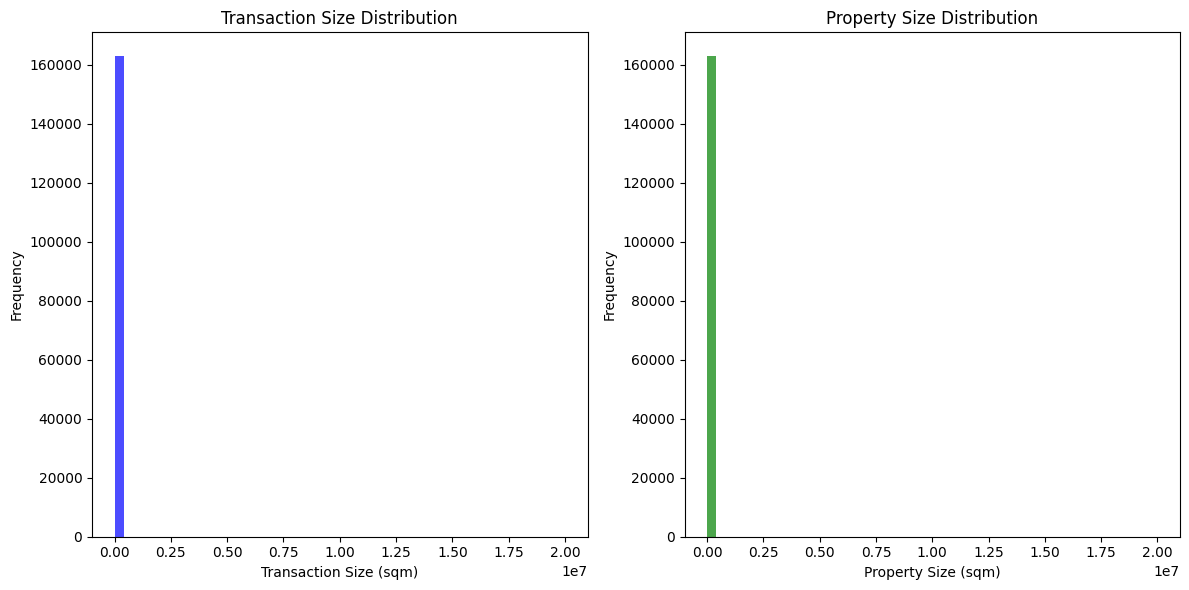

In [137]:
import matplotlib.pyplot as plt

# Plot distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(no_missing_merged_loc['transaction_size_sqm'], bins=50, color='blue', alpha=0.7)
plt.title("Transaction Size Distribution")
plt.xlabel("Transaction Size (sqm)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(no_missing_merged_loc['property_size_sqm'], bins=50, color='green', alpha=0.7)
plt.title("Property Size Distribution")
plt.xlabel("Property Size (sqm)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### This suggests that the data is skewed and have outliers. QuantileTransformer is needed during the training part to avoid the data leakage

In [138]:
no_missing_merged_loc['is_offplan']

0         t
1         t
2         t
3         t
4         t
         ..
162801    f
162802    f
162803    f
162804    f
162805    f
Name: is_offplan, Length: 162806, dtype: object

In [139]:
no_missing_merged_loc['is_freehold']

0         t
1         t
2         f
3         t
4         t
         ..
162801    t
162802    f
162803    t
162804    f
162805    f
Name: is_freehold, Length: 162806, dtype: object

In [140]:
no_missing_merged_loc['is_freehold_encoded']

0         1
1         1
2         0
3         1
4         1
         ..
162801    1
162802    0
162803    1
162804    0
162805    0
Name: is_freehold_encoded, Length: 162806, dtype: int64

In [141]:
no_missing_merged_loc['property_type_en'].unique()

array(['Unit', 'Building', 'Land'], dtype=object)

In [142]:
categorical_columns = [
    'is_offplan', 'is_freehold', 'property_type_en',
    'property_subtype_en', 'project_name_en', 
]

In [143]:
for col in categorical_columns:
    print(no_missing_merged_loc[col].unique())

['t' 'f']
['t' 'f']
['Unit' 'Building' 'Land']
['Flat' 'Villa' 'Hotel Apartment' 'Hotel Rooms' 'Government Housing'
 'Residential' 'Shop' 'Office' 'Commercial' 'Industrial' 'Land'
 'Residential Flats' 'Hotel' 'Airport' 'Stacked Townhouses' 'Unit'
 'Sports Club' 'School' 'Agricultural' 'General Use' 'Labor Camp' 'Clinic'
 'Building' 'Petrol Station' 'Commercial / Offices / Residential'
 'Show Rooms' 'Workshop' 'Electricity Station' 'Warehouse' 'Hospital'
 'Gymnasium' 'Sized Partition' 'Residential / Attached Villas'
 'Health Club' 'Residential / Villas' 'Exhbition Center' 'Consulate']
['THE VYBE' 'Elitz 3 By Danube ' 'TRIA BY DEYAAR' ...
 'The Oasis - Palmiera 3' 'azizi veince 12' 'LA VISTA 05']


In [144]:
no_missing_merged_loc['property_subtype_en'].unique()

array(['Flat', 'Villa', 'Hotel Apartment', 'Hotel Rooms',
       'Government Housing', 'Residential', 'Shop', 'Office',
       'Commercial', 'Industrial', 'Land', 'Residential Flats', 'Hotel',
       'Airport', 'Stacked Townhouses', 'Unit', 'Sports Club', 'School',
       'Agricultural', 'General Use', 'Labor Camp', 'Clinic', 'Building',
       'Petrol Station', 'Commercial / Offices / Residential',
       'Show Rooms', 'Workshop', 'Electricity Station', 'Warehouse',
       'Hospital', 'Gymnasium', 'Sized Partition',
       'Residential / Attached Villas', 'Health Club',
       'Residential / Villas', 'Exhbition Center', 'Consulate'],
      dtype=object)

In [145]:
# Define grouping for all unique subtypes
grouped_subtypes = {
    'Residential': [
        'Flat', 'Villa', 'Residential', 'Residential Flats', 
        'Residential / Villas', 'Residential / Attached Villas', 'Stacked Townhouses'
    ],
    'Commercial': [
        'Shop', 'Office', 'Commercial', 'Commercial / Offices / Residential', 
        'Show Rooms', 'Building', 'Unit', 'General Use'
    ],
    'Institutional': [
        'School', 'Hospital', 'Clinic', 'Health Club', 'Gymnasium', 'Exhbition Center', 'Consulate'
    ],
    'Industrial': [
        'Industrial', 'Warehouse', 'Workshop', 'Sized Partition', 'Electricity Station', 'Labor Camp'
    ],
    'Hospitality': [
        'Hotel', 'Hotel Apartment', 'Hotel Rooms', 'Sports Club'
    ],
    'Infrastructure': [
        'Airport', 'Petrol Station'
    ],
    'Land': [
        'Land', 'Agricultural'
    ],
    'Other': [
        'Government Housing'
    ]
}

# Ensure all unique values are covered
all_defined_values = [item for sublist in grouped_subtypes.values() for item in sublist]
undefined_values = set(no_missing_merged_loc['property_subtype_en'].unique()) - set(all_defined_values)

# If there are undefined values, add them to the "Other" category
if undefined_values:
    print(f"Undefined values: {undefined_values}")
    grouped_subtypes['Other'].extend(undefined_values)

# Map subtypes to broader categories
no_missing_merged_loc['property_subtype_grouped'] = no_missing_merged_loc['property_subtype_en'].map(
    lambda x: next((k for k, v in grouped_subtypes.items() if x in v), 'Other')
)




In [146]:
no_missing_merged_loc['property_subtype_grouped'].unique()

array(['Residential', 'Hospitality', 'Other', 'Commercial', 'Industrial',
       'Land', 'Infrastructure', 'Institutional'], dtype=object)

In [147]:
# Encode the grouped subtypes
from sklearn.preprocessing import LabelEncoder
grouped_le = LabelEncoder()
no_missing_merged_loc['property_subtype_encoded'] = grouped_le.fit_transform(no_missing_merged_loc['property_subtype_grouped'])

# Drop the original column
no_missing_merged_loc.drop(columns=['property_subtype_en', 'property_subtype_grouped'], inplace=True)

# Display the mapping for grouped subtypes
grouped_mapping = dict(zip(grouped_le.classes_, grouped_le.transform(grouped_le.classes_)))
print("Grouped Subtypes Mapping:")
print(grouped_mapping)

Grouped Subtypes Mapping:
{'Commercial': 0, 'Hospitality': 1, 'Industrial': 2, 'Infrastructure': 3, 'Institutional': 4, 'Land': 5, 'Other': 6, 'Residential': 7}


In [148]:
no_missing_merged_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162806 entries, 0 to 162805
Data columns (total 58 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   transaction_type_id                162806 non-null  category
 1   property_usage_id                  162806 non-null  category
 2   amount                             162806 non-null  float64 
 3   total_buyer                        162806 non-null  int64   
 4   total_seller                       162806 non-null  int64   
 5   transaction_size_sqm               162806 non-null  float64 
 6   property_size_sqm                  162806 non-null  float64 
 7   is_offplan                         162806 non-null  object  
 8   is_freehold                        162806 non-null  object  
 9   property_type_en                   162806 non-null  object  
 10  project_name_en                    162806 non-null  object  
 11  area_en                   

 7   is_offplan                         162806 non-null  object  
 8   is_freehold                        162806 non-null  object  
 9   property_type_en                   162806 non-null  object  
 10  project_name_en                    162806 non-null  object  
 11  area_en                            162806 non-null  object  
 12  nearest_landmark_en                162806 non-null  object  
 13  nearest_metro_en                   162806 non-null  object  
 14  nearest_mall_en                    162806 non-null  object  

In [149]:
no_missing_merged_loc = no_missing_merged_loc.drop(columns=['is_freehold'])
no_missing_merged_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162806 entries, 0 to 162805
Data columns (total 57 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   transaction_type_id                162806 non-null  category
 1   property_usage_id                  162806 non-null  category
 2   amount                             162806 non-null  float64 
 3   total_buyer                        162806 non-null  int64   
 4   total_seller                       162806 non-null  int64   
 5   transaction_size_sqm               162806 non-null  float64 
 6   property_size_sqm                  162806 non-null  float64 
 7   is_offplan                         162806 non-null  object  
 8   property_type_en                   162806 non-null  object  
 9   project_name_en                    162806 non-null  object  
 10  area_en                            162806 non-null  object  
 11  nearest_landmark_en       

In [151]:
# Drop the specified columns
columns_to_drop = [
    'project_name_en', 
    'area_en', 
    'nearest_landmark_en', 
    'nearest_metro_en', 
    'nearest_mall_en'
]

no_missing_merged_loc.drop(columns=columns_to_drop, inplace=True)

# Verify the changes
print(no_missing_merged_loc.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 162806 entries, 0 to 162805
Data columns (total 52 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   transaction_type_id                162806 non-null  category
 1   property_usage_id                  162806 non-null  category
 2   amount                             162806 non-null  float64 
 3   total_buyer                        162806 non-null  int64   
 4   total_seller                       162806 non-null  int64   
 5   transaction_size_sqm               162806 non-null  float64 
 6   property_size_sqm                  162806 non-null  float64 
 7   is_offplan                         162806 non-null  object  
 8   property_type_en                   162806 non-null  object  
 9   transaction_datetime_month         162806 non-null  int64   
 10  transaction_datetime_day           162806 non-null  int64   
 11  transaction_datetime_weekd

In [152]:
no_missing_merged_loc['property_type_en'].unique()

array(['Unit', 'Building', 'Land'], dtype=object)

In [153]:
from sklearn.preprocessing import LabelEncoder

# Convert 'is_offplan' to categorical and encode
is_offplan_encoder = LabelEncoder()
no_missing_merged_loc['is_offplan_encoded'] = is_offplan_encoder.fit_transform(
    no_missing_merged_loc['is_offplan']
)
print("is_offplan mapping:", dict(zip(is_offplan_encoder.classes_, is_offplan_encoder.transform(is_offplan_encoder.classes_))))

# Convert 'property_type_en' to categorical and encode
property_type_encoder = LabelEncoder()
no_missing_merged_loc['property_type_encoded'] = property_type_encoder.fit_transform(
    no_missing_merged_loc['property_type_en']
)
print("property_type_en mapping:", dict(zip(property_type_encoder.classes_, property_type_encoder.transform(property_type_encoder.classes_))))

# Drop the original columns
no_missing_merged_loc.drop(columns=['is_offplan', 'property_type_en'], inplace=True)

# Verify the changes
print(no_missing_merged_loc.info())


is_offplan mapping: {'f': 0, 't': 1}
property_type_en mapping: {'Building': 0, 'Land': 1, 'Unit': 2}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162806 entries, 0 to 162805
Data columns (total 52 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   transaction_type_id                162806 non-null  category
 1   property_usage_id                  162806 non-null  category
 2   amount                             162806 non-null  float64 
 3   total_buyer                        162806 non-null  int64   
 4   total_seller                       162806 non-null  int64   
 5   transaction_size_sqm               162806 non-null  float64 
 6   property_size_sqm                  162806 non-null  float64 
 7   transaction_datetime_month         162806 non-null  int64   
 8   transaction_datetime_day           162806 non-null  int64   
 9   transaction_datetime_weekday       162806 non-null  int64

In [154]:
no_missing_merged_loc.to_csv('clean_for_training.csv')